# Testy zgodności

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#Test zgodności chi-kwadrat
Hipoteza zerowa i alternatywna
\begin{equation*}
H_0: F = F_0,\\
H_1: F \neq F_0,
\end{equation*}
gdzie $F_0$ jest w pełni ustaloną dystrybuantą.

Statystyka testowa:
\begin{equation*}
    T = \sum_{i=1}^k\frac{(n_i - np_i)^2}{np_i}
\end{equation*}

gdzie $p_i$ obliczamy ze wzoru
\begin{equation*}
    p_i = F_0(\xi_i) - F_0(\xi_{i-1}),
\end{equation*}
gdzie $\xi_0, \ldots, \xi_k$ oznaczają krańce przedziałów klasowych.

Obszar krytyczny testu na przyjętym poziomie istotności $\alpha$ będzie miał postać
\begin{equation*}
    W_{\alpha} = [\chi^2_{1-\alpha,k-1}, +\infty],
\end{equation*}
gdzie $\chi^2_{1-\alpha,k-1}$ oznacza kwantyl rzędu $1-\alpha$ rozkładu chi-kwadrat o $k-1$ stopniach swobody.

# Zadanie 1
W losowo wziętym tygodniu wydarzyło się w Warszawie 414 wypadków i kolizji drogowych, przy czym ich rozkład w poszczególnych dniach tygodnia wyglądał następująco:

| Dzień tygodnia  | Poniedziałek | Wtorek | Środa | Czwartek | Piątek | Sobota | Niedziela |
|-----------------|:------------:|:------:|:-----:|:--------:|:------:|:------:|:---------:|
| Liczba wypadków |      78      |   56   |   52  |    58    |   83   |   42   |     45    |


Stwierdzić, czy rozkład wypadków w poszczególne dni tygodnia jest równomiernny. Przyjąć poziom istotności 0.05.

a) Testujemy hipotezę zerową, że nasza próbka jest z rozkładu jednostajnego dyskretnego na przedziale {1,7} (co oznacza, że dla każdej wartości od 1 do 7 mamy prawdopodobieństwo równe $\frac{1}{7}$).
$$
H_0: F = U\{1,7\}
$$

In [3]:
wyniki = np.array([78, 56, 52, 58, 83, 42, 45])
n = wyniki.sum()
npi = (1/7) * wyniki.sum()
alpha = 0.05
chi2 = stats.chi2(6) # 6 stopni swobody

T = 0
for ni in wyniki:
    T = T + ((ni - npi)**2)/npi

print("T =", T)
print("Chi2 =", chi2.ppf(q=1-alpha))

print("p-value =", 1-chi2.cdf(T))

T = 25.03864734299517
Chi2 = 12.591587243743977
p-value = 0.0003358740293726292


In [4]:
# automatycznie
stats.chisquare(f_obs = wyniki, f_exp = n/7)  # dla zdefiniowanego rozkładu prawdopodobieństwa

Power_divergenceResult(statistic=25.03864734299517, pvalue=0.0003358740293725965)

In [5]:
stats.chisquare(f_obs = wyniki)  # dla rozkładu jednorodnego (płaski rozkład prawdopodobieństwa)

Power_divergenceResult(statistic=25.03864734299517, pvalue=0.0003358740293725965)

# Zadanie 2
W celu zbadania, czy program generujący liczby losowe z rozkładu dwumianowego działa prawidłowo, wygenerowano 100 liczb i otrzymano następujące wyniki:

| Wygenerowana liczba losowa | 0  | 1  | 2  | 3  |
|----------------------------|----|----|----|----|
| Liczba uzyskanych wyników  | 12 | 37 | 38 | 13 |

Zweryfikować odpowiednią hipotezę na poziomie istotności 0.05 zakładając że:

a) wiemy że program powinien generować liczby z rozkładu dwumianowego z parametrami $n=3$ i $p=0.5$,

b) wiemy że program powinien generować liczby z rozkładu dwumianowego z parametrem $n=3$ i pewnym nieznanym prametrem $p$. 

a) Testujemy hipotezę zerową
$$
H_0: F = \text{Bin}(n=3, p=\frac{1}{2}).
$$

In [19]:
wyniki = np.array([12, 37, 38, 13])

binom = stats.binom(n=3, p=0.5)
stats.chisquare(f_obs = wyniki, f_exp = 100*binom.pmf([0, 1, 2, 3]))

Power_divergenceResult(statistic=0.05333333333333333, pvalue=0.9967761206252433)

b) Testujemy hipotezę zerową
$$
H_0: F = \text{Bin}(n=3, p).
$$

Estymator największej wiarygodności parametru $p$ dla rozkładu dwumianowego:

\begin{equation*}
\hat{p} = \frac{\bar{X}}{n}
\end{equation*}

In [21]:
wyniki = np.array([12, 37, 38, 13])
p = np.mean(np.array([[0] * 12 + [1] * 37 + [2] * 38 + [3] * 13])) / 3

binom = stats.binom(n=3, p=p)
stats.chisquare(f_obs = wyniki, f_exp = 100*binom.pmf([0, 1, 2, 3]))  # bardziej ogólna hipoteza, większe p_value

Power_divergenceResult(statistic=9.487102235448503e-06, pvalue=0.9999999922282657)

# Zadanie 3

W pewnej fabryce badano wagi 100 tabliczek czekolady. Uzyskano następujące rezutaty:

| Waga | Ilość |
|:---------:|:----------:|
|     130g-140g    |     2     |
|     140g-150g    |     21     |
|     150g-160g    |     64     |
|     160g-170g    |     12     |
|     170g-180g    |     1     |

Sprawdź czy rozkład wagi tabliczek czekolady jest rozkładem normalnym $N(155,6)$.

In [43]:
wyniki = np.array([2, 21, 64, 12, 1])

normal = stats.norm(loc=155, scale=6)

#zakres = [130, 140, 150, 160, 170, 180]  # BŁĄD, bo prawdopodobieństwa nie sumują się do 1
zakres = [-np.infty, 140, 150, 160, 170, np.infty]  # "lekka zmiana hipotezy roboczej"

p = []
for i in range(len(zakres)-1):
    p.append(normal.cdf(zakres[i+1]) - normal.cdf(zakres[i]))
    
print(p, np.sum(p))

stats.chisquare(f_obs = wyniki, f_exp = 100*np.array(p))

[0.006209665325776132, 0.19611871563786695, 0.5953432380727137, 0.19611871563786698, 0.006209665325776159] 1.0


Power_divergenceResult(statistic=6.681482455436003, pvalue=0.1537086879913707)

In [42]:
# inny test (dla reprezentantów przedziału - w tym wypadku średnich)

x = np.concatenate([[135] * 2, [145] * 21, [155] * 64, [165] * 12, [175] * 1])
stats.jarque_bera(x)  # sprawdzenie tylko normalności rozkładu (rodzina rozkładów)

Jarque_beraResult(statistic=4.3001663498376885, pvalue=0.11647446961603891)

# Dystrybuanta empiryczna
Mamy próbę $X_1,X_2,...,X_n$. Wówczas dystrybuantę empiryczną definiujemy jako:
\begin{equation*}
\hat{F}(t) = \frac{\#X_i: X_i\leqslant t}{n}
\end{equation*}
Niech nasza próbka będzie: $\{X_1,X_2,X_3,X_4,X_5,X_6\} = \{10,20,70,30,40,30\}$
\begin{equation*}
\hat{F}(35) = \frac{\#X_i: X_i\leqslant 35}{6}  = \frac{4}{6} = \frac{2}{3}
\end{equation*}


# Test Kołmogorowa-Smirnowa 
Hipoteza zerowa i alternatywna
\begin{equation*}
    H_0: F_1 = F_2,\\
    H_1: F_1 \neq F_2,
\end{equation*}
gdzie $F_1$ jest dystrybuantą pierwszej próby, a $F_2$  drugiej próby.

Założenie: Rozkłady badanych cech powinny być ciągłe.

Niech $X_1, \ldots, X_{n}$ będzie próbą losową pochodzącą z pierwszej populacji, natomiast $Y_1, \ldots, Y_{m}$ próbą losową pochodzącą z drugiej populacji.

Statystyka testowa:
\begin{equation*}
    D_{n, m} = \sup_x |\hat{F}_n(x) - \hat{F}_m(x)|,
\end{equation*}
gdzie $\hat{F}_n(x)$ i $\hat{F}_m(x)$ oznaczają, odpowiednio, dystrybuanty empiryczne wyznaczone na podstawie pierwszej i drugiej próbki.

Zbyt duże wartości tej statystyki świadczą przeciw hipotezie zerowej, stąd obszar krytyczny testu ma postać
\begin{equation*}
    W_{\alpha} = [d(\alpha, n, m), 1],
\end{equation*}
gdzie $d(\alpha, n, m)$ jest wartością krytyczną rozkładu statystyki~$D_{n, m}$.


# Zadanie 4
W jednej ze szkół uczniowie przystąpili do egzaminu z języka obcego, z którego można otrzymać max 50 punktów. Dwunastu z nich wybrało język angielski, a dziewięciu język niemiecki. Uzyskane przez nich rezultaty przedstawia poniższa tabela:

| J. angielski | J. niemiecki |
|:---------:|:----------:|
|     12    |     28     |
|     41    |     14     |
|     38    |     32     |
|     27    |     49     |
|     35    |     43     |
|     19    |     21     |
|     23    |     33     |
|     47    |     40     |
|     25    |     15     |
|     15    |            |
|     31    |            |
|     28    |            |

Sprawdź czy jest istotna róznica między wynikami z testu z języka angielskiego i z test z języka niemieckiego.

In [44]:
ang = np.array([12, 41, 38, 27, 35, 19, 23, 47, 25, 15, 31, 28])
nie = np.array([28, 14, 32, 49, 43, 21, 33, 40, 15])

In [45]:
ang_nie = np.concatenate((ang, nie))
label = np.concatenate((np.repeat('ang', len(ang)), np.repeat('nie', len(nie))))

ang_nie  # stworzenie jednej wspólnej próbki (tylko na potrzeby wizualizacji!)

array([12, 41, 38, 27, 35, 19, 23, 47, 25, 15, 31, 28, 28, 14, 32, 49, 43,
       21, 33, 40, 15])

<AxesSubplot:ylabel='Proportion'>

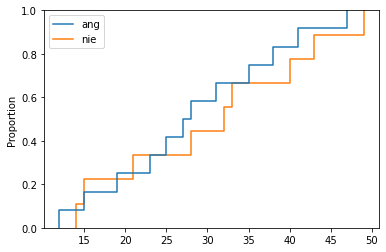

In [46]:
sns.ecdfplot(x = ang_nie, hue = label)  # graficzne porównanie dystrybuant empirycznych

In [47]:
stats.ks_2samp(data1 = ang, data2 = nie)  # test bada największą różnicę pomiędzy dystrybuantami

KstestResult(statistic=0.2222222222222222, pvalue=0.9317660667505872)

# Zadanie 5
Korzystając z testu Kołmogorowa-Smirnowa zbadać, czy rozkłady zużycia paliwa (zmienna `mpg`) przez samochody produkowane w Europie i w Japonii różnią się istotnie. Przeprowadzić badania na podstawie danych dotyczących parametrów kilku wybranych marek samochodów zamieszczonych w pliku `samochody.csv`.

In [52]:
samochody = pd.read_csv('../../data/samochody.csv', sep='\t')

europa = samochody.mpg[samochody.producent == 2]
japonia = samochody.mpg[samochody.producent == 3]

KstestResult(statistic=0.22377622377622378, pvalue=0.3288024902540198)

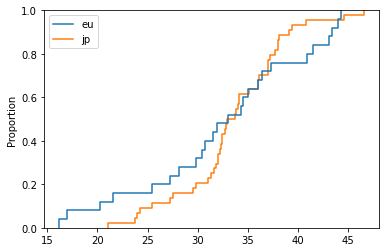

In [55]:
total = np.concatenate((europa, japonia))
label = np.concatenate((np.repeat('eu', len(europa)), np.repeat('jp', len(japonia))))

sns.ecdfplot(x = total, hue = label)

stats.ks_2samp(data1 = europa, data2 = japonia)

# Test Kruskala-Wallisa
Uogólnienie testu Kołmogorowa-Smirnowa. Hipoteza zerowa i alternatywna:
\begin{equation*}
    H_0: F_1 = F_2 = \ldots = F_k,\\
    H_1: \neg H_0 
\end{equation*}
Sprawdzamy hipotezę czy rozkłady wszystkich prób są takie same. Hipotezą alternatywną jest to, czy rozkład badanej cechy nie we wszystkich populacjach jest taki sam.

Założenia: Rozważane rozkłady powinny być ciągłe.




Załóżmy, że mamy $k$ próbek o licznościach $n_1, \ldots, n_k$, przy czym $\sum_{i=1}^k n_i = n$;

 Obserwacje pochodzące ze wszystkich $k$ prób ustawiamy w porządku rosnącym;

Numerujemy kolejnymi liczbami naturalnymi (nadajemy tzw. rangi). Jeżeli kilka kolejnych wyników ma tę samą wartość, to każdemu z nich przypisujemy rangę będącą średnią arytmetyczną przypisanych im liczb naturalnych;

 Dla każdej próbki oddzielnie wyznaczamy sumę rang $R_i$, po czym obliczamy wartość  statystyki testowej.



Postać statystyki testowej testu Kruskala-Wallisa jest postaci
\begin{equation*}
    \begin{split}
        T &= \frac{12}{n(n+1)}\sum_{i=1}^k n_i\left(\frac{R_i}{n_i} - \frac{(n+1)}{2}\right)^2 \\
        &= \frac{12}{n(n+1)} \sum_{i=1}^k \frac{R_i^2}{n_i} - 3(n+1).
    \end{split}
\end{equation*}

Przy założeniu prawdziwości hipotezy zerowej statystyka ma asymptotyczny rozkład chi-kwadrat o $k-1$ stopniach swobody.

Obszar krytyczny ma postać
\begin{equation*}
    W_{\alpha} = [\chi^2_{1-\alpha, k-1}, +\infty),
\end{equation*}
gdzie $\chi^2_{1-\alpha, k-1}$ oznacza kwantyl rzędu $1-\alpha$ rozkładu chi-kwadrat o $k-1$ stopniach swobody (tj. \textit{duże wartości statystyki świadczą przeciwko hipotezie zerowej}).

# Zadanie 6
Piętnastu pacjentów będących w podobnej kondycji psychofizycznej i cierpiących na tę samą chorobę psychiczną zostało w sposób losowy podzielonych na trzy grupy, po czym każda z grup została podana innej formie terapii. Po upływie 6 miesięcy wszystkich 15 pacjentów poddano badaniu (w skali od 0 do 100), którego wyniki zawiera poniższa tabela:

| Terapia I | Terapia II | Terapia III |
|:---------:|:----------:|:-----------:|
|     73    |     96     |      12     |
|     79    |     92     |      26     |
|     86    |     89     |      33     |
|     91    |     95     |      8      |
|     35    |     76     |      78     |

Posługując się odpowiednim testem stwierdzić, czy zastosowane formy terapii są równie skuteczne. Przyjąć poziom istotności 0.05.

In [57]:
t1 = [73, 79, 86, 91, 35]
t2 = [96, 92, 89, 95, 76]
t3 = [12, 26, 33, 8, 78]

t_all = np.concatenate((t1, t2, t3))
print(np.sort(t_all))

[ 8 12 26 33 35 73 76 78 79 86 89 91 92 95 96]


In [58]:
stats.kruskal(t1, t2, t3)

KruskalResult(statistic=8.879999999999995, pvalue=0.011795938519751595)

# Zadanie 7
Na podstawie danych dotyczących parametrów kilku wybranych marek samochodów (plik `samochody.csv`) stwierdzić, czy istnieją istotne różnice w mocy silników samochodowych produkowanych w USA, Japonii i Europie.

$
H_0: F_{\text{USA}} = F_{\text{Japonia}} = F_{\text{Europa}}
$

$
H_1: \neg H_0
$

In [66]:
samochody = pd.read_csv("../../data/samochody.csv",sep = '\t')
samochody.head()

,mpg,cylindry,moc,przysp,rok,waga,producent,marka,model,cena,legenda
0,43.1,4,48.0,21.5,78,1985,2,Volkswagen,Rabbit Dl,2400,America=1
1,36.1,4,66.0,14.4,78,1800,1,Ford,Fiesta,1900,Europe=2
2,32.8,4,52.0,19.4,78,1985,3,Mazda,GLC Deluxe,2200,Japan =3
3,39.4,4,70.0,18.6,78,2070,3,Datsun,B210 GX,2725,
4,36.1,4,60.0,16.4,78,1800,3,Honda,Civic CVCC,2250,


KruskalResult(statistic=30.095091656185954, pvalue=2.9169828830351756e-07)

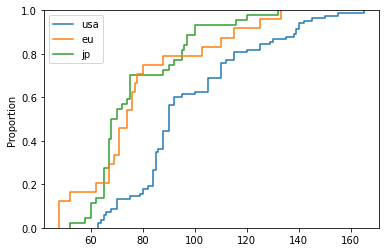

In [68]:
usa = samochody.moc[samochody.producent == 1].dropna()
europa = samochody.moc[samochody.producent == 2].dropna()
japonia = samochody.moc[samochody.producent == 3].dropna()

total = np.concatenate((usa, europa, japonia))
label = np.concatenate((np.repeat('usa', len(usa)), np.repeat('eu', len(europa)), np.repeat('jp', len(japonia))))

sns.ecdfplot(x = total, hue = label)

stats.kruskal(usa, europa, japonia)
# stats.kruskal(usa, europa, japonia, nan_policy='omit')  # ogólniejszy sposób (decyzja, co robimy z NaN)